<a href="https://colab.research.google.com/github/Anshuldogra001/LGM_internship/blob/main/Task1(b).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Name- Abhinav Dogra
#Task-1(b) Stock Market Prediction And Forecasting Using Stacked LSTM
#VIP@ LetsGrowMore
* To perform ‘Stock Market Prediction And Forecasting’ on stock of ‘Tata’.

* Create a hybrid model for stock performance prediction using numerical analysis of historical stock prices.

* We are going to use python 

In [1]:
# Import the libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import nltk
import re
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost
import lightgbm

In [35]:
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn import datasets
from plotnine import *
tata_data=pd.read_csv('/content/NSE-TATAGLOBAL.csv')

In [36]:
tata_data.reset_index(inplace=True)
tata_data.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [37]:
tata_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 2035 non-null   int64  
 1   Date                  2035 non-null   object 
 2   Open                  2035 non-null   float64
 3   High                  2035 non-null   float64
 4   Low                   2035 non-null   float64
 5   Last                  2035 non-null   float64
 6   Close                 2035 non-null   float64
 7   Total Trade Quantity  2035 non-null   int64  
 8   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 143.2+ KB


In [38]:
tata_data.describe()

,index,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,1017.000000,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,587.598219,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,0.000000,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,508.500000,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,1017.000000,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,1525.500000,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,2034.000000,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [39]:
tata_data.cov()

,index,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
index,3.452717e+05,-1.982508e+04,-2.011250e+04,-1.961223e+04,-1.988088e+04,-1.988360e+04,-3.138029e+08,-1.082892e+06
Open,-1.982508e+04,2.368234e+03,2.402297e+03,2.329844e+03,2.366284e+03,2.365428e+03,3.928804e+07,1.363248e+05
High,-2.011250e+04,2.402297e+03,2.441655e+03,2.365561e+03,2.405993e+03,2.405074e+03,4.200653e+07,1.424222e+05
Low,-1.961223e+04,2.329844e+03,2.365561e+03,2.297473e+03,2.333630e+03,2.332806e+03,3.816217e+07,1.333141e+05
Last,-1.988088e+04,2.366284e+03,2.405993e+03,2.333630e+03,2.374863e+03,2.373771e+03,4.070656e+07,1.391231e+05
Close,-1.988360e+04,2.365428e+03,2.405074e+03,2.332806e+03,2.373771e+03,2.372863e+03,4.064693e+07,1.389818e+05
Total Trade Quantity,-3.138029e+08,3.928804e+07,4.200653e+07,3.816217e+07,4.070656e+07,4.064693e+07,4.375536e+12,8.862417e+09
Turnover (Lacs),-1.082892e+06,1.363248e+05,1.424222e+05,1.333141e+05,1.391231e+05,1.389818e+05,8.862417e+09,2.089192e+07


In [40]:
tata_data.corr()

,index,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
index,1.000000,-0.693302,-0.692697,-0.696340,-0.694282,-0.694669,-0.255306,-0.403195
Open,-0.693302,1.000000,0.999015,0.998825,0.997781,0.997840,0.385951,0.612877
High,-0.692697,0.999015,1.000000,0.998773,0.999155,0.999194,0.406405,0.630589
Low,-0.696340,0.998825,0.998773,1.000000,0.999051,0.999119,0.380621,0.608502
Last,-0.694282,0.997781,0.999155,0.999051,1.000000,0.999961,0.399328,0.624584
Close,-0.694669,0.997840,0.999194,0.999119,0.999961,1.000000,0.398911,0.624213
Total Trade Quantity,-0.255306,0.385951,0.406405,0.380621,0.399328,0.398911,1.000000,0.926931
Turnover (Lacs),-0.403195,0.612877,0.630589,0.608502,0.624584,0.624213,0.926931,1.000000


Text(0, 0.5, 'Close')

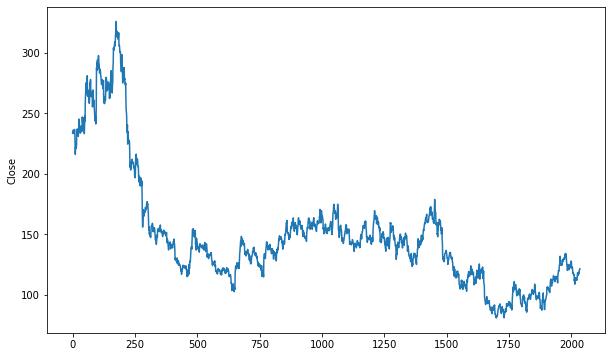

In [41]:
plt.figure(figsize=(10, 6))
tata_data['Close'].plot()
plt.ylabel('Close')

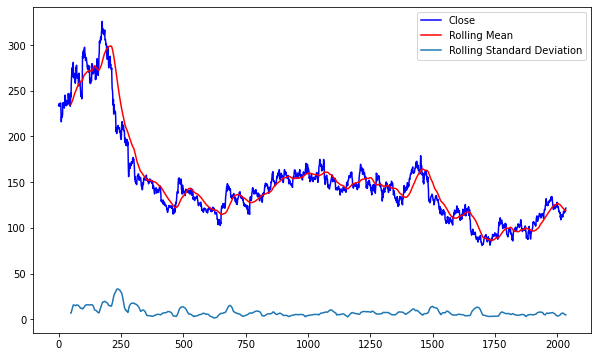

In [42]:
#Plotting moving average
close = tata_data['Close']
ma = close.rolling(window = 50).mean()
std = close.rolling(window = 50).std()

plt.figure(figsize=(10, 6))
tata_data['Close'].plot(color = 'b', label = 'Close')
ma.plot(color = 'r', label = 'Rolling Mean')
std.plot(label = 'Rolling Standard Deviation')
plt.legend()

In [44]:
train = tata_data[:1000]
test = tata_data[1000:]

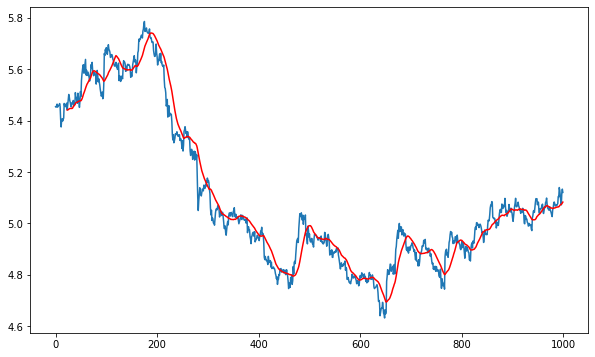

In [45]:
import numpy as np
train_log = np.log(train['Close']) 
test_log = np.log(test['Close'])

mav = train_log.rolling(24).mean() 
plt.figure(figsize = (10,6))
plt.plot(train_log) 
plt.plot(mav, color = 'red') 

In [46]:
!pip install pmdarima 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 4.3 MB/s 
     |████████████████████████████████| 9.8 MB 39.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [47]:
#Using auto arima to make predictions using log data
from pmdarima import auto_arima
model = auto_arima(train_log, trace = True, error_action = 'ignore', suppress_warnings = True)
model.fit(train_log)
predictions = model.predict(n_periods = len(test))
predictions = pd.DataFrame(predictions,index = test_log.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-4984.272, Time=2.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-4984.529, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-4982.903, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-4982.912, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-4986.248, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-4986.299, Time=1.36 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-4979.081, Time=0.73 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-4983.006, Time=0.83 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-4981.058, Time=0.48 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-4981.095, Time=0.37 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-4987.037, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-4984.620, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-4984.611, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-4988.328, Time=1.50 sec
 ARIMA(2,1,0)(0,0,0

Text(0, 0.5, 'Actual Stock Price')

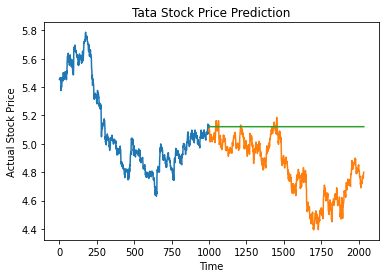

In [48]:
plt.plot(train_log, label='Train')
plt.plot(test_log, label='Test')
plt.plot(predictions, label='Prediction')
plt.title('Tata Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')

####From this Analysis we came to conclusion that the price of stock are going to go down but when the stock price is around   4.4-4.5 its the best time to buy the stock ecause the price then rise.